# Libraries

In [1]:
# default libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# plotting configuration
sns.set(style = 'darkgrid',
        font_scale = 1.4,
        rc = {"lines.linewidth": 2,
          "figure.figsize": (12, 8)})

sns.set_palette('Set2')

In [3]:
# load implemented packages
from tools import get_alpha_quantile_student, jackknife_cookie_bucket_mean,\
jackknife_cookie_bucket_quantile

### Test computation of quantiles

In [4]:
assert np.abs(get_alpha_quantile_student(ci_level = 0.9) - 1.73) < 0.01
assert np.abs(get_alpha_quantile_student(ci_level = 0.95) - 2.09) < 0.01
assert np.abs(get_alpha_quantile_student(ci_level = 0.99) - 2.86) < 0.01

# Jackknife cookie bucket test for means

### Description

Let $M$ be some metric of interest. Let subscript 0 correspond to the control group and 1 - to the treatment group. Then the Jackknife Cookie Bucket test is defined as follows:
* Data is split randomly in $N$ buckets (we use $N=20$)
* Let $M_{0,-j}$ is the mean value of the metric observed in the control $M_{0}$ across all buckets **except** $j$. $M_{1,-j}$ is defined similarly. The second index omited in case one refers to the total change in the metric value across all buckets
* Overall percent change in all buckets is defined as: $$ PC= 100\times \left(  \frac{M_1}{M_0}-1 \right) $$
* Overall percent change in all buckets, except $j$, is defined as: $$ PC_{-j}= 100\times \left(  \frac{M_{1,-j}}{M_{0,-j}}-1 \right)$$
* Then define: $$ D_{-j} = N*PC-(N-1)*PC_{-j} $$ and $$\overline{D}=\frac{1}{N}\sum_{j=1}^N D_{-j}, \qquad SE_{D}^2=\frac{1}{N-1}\sum_{j=1}^{N}(\overline{D}-D_{-j})^2$$ 
* The final confidence interval for performing the test is defined as: $$ \left[ \overline{D}- q_{N-1,\alpha/2}\cdot SE_{D}/\sqrt{N};\ \overline{D}+ q_{N-1,\alpha}\cdot SE_{D}/\sqrt{N} \right] $$
where $q_{N-1,\alpha}$ corresponds to the corresponding quantile of the Student t-distribution with $N-1$ degrees of freedom. If $N=20$, then $q_{19,0.9}\approx 1.73, q_{19,0.95}\approx 2.09, q_{19,0.99}\approx 2.86$


### Test for the Normal case with the same mean and same variance (Null)

In [5]:
mean_metric_control = 50
mean_metric_treatement = 50
num_of_clients = 5000

In [6]:
num_of_simulations = 1000

In [7]:
# 1 will correspond to rejecting the null
coverage_results = list()

for cur_sim in range(num_of_simulations):
  # simulate data
  metric_treatment = np.random.normal(loc = mean_metric_treatement, scale=5, size=[num_of_clients, 1])
  metric_control = np.random.normal(loc = mean_metric_control, scale=5, size=[num_of_clients, 1])
  client_id = np.arange(1, num_of_clients + 1).reshape(num_of_clients, 1) 

  # create required data frames
  df_treatment = pd.DataFrame(data = np.concatenate([client_id, metric_treatment],axis=1), columns=['Client ID', 'Metric Value'] )
  df_control = pd.DataFrame(data = np.concatenate([client_id, metric_control],axis=1), columns=['Client ID', 'Metric Value'] ) 

  # perform test
  ci_center, ci_width = jackknife_cookie_bucket_mean(df_treatment, df_control, 20, 0.95)

  if (ci_center - ci_width < 0) and  (ci_center + ci_width > 0):
    coverage_results += [0]
  else:
    coverage_results += [1]


In [8]:
print('Rejection rate: {:2.2%}'.format(np.mean(coverage_results)))

Rejection rate: 5.40%


In [47]:
ci_center

0.24481440540717436

In [48]:
ci_width

0.4326400968941803

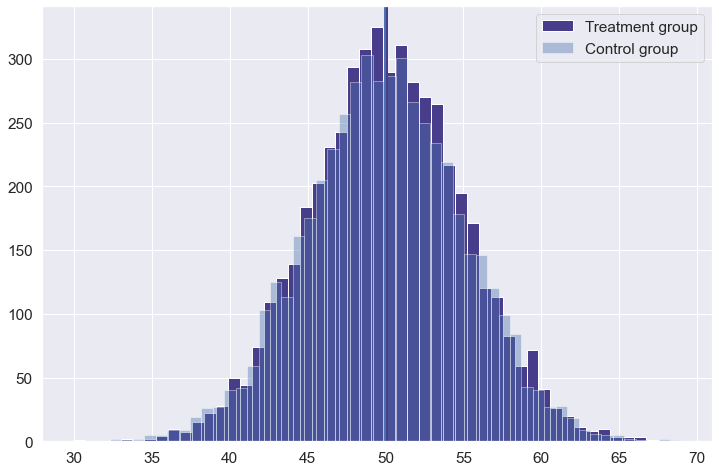

In [50]:
plt.hist(metric_treatment, bins=50, label='Treatment group', color='darkslateblue')
plt.axvline(np.mean(metric_treatment), c='darkslateblue')
plt.hist(metric_control, bins=50, alpha=0.4, label='Control group', color='b')
plt.axvline(np.mean(metric_control), c='b')
plt.legend()
plt.show()

### Test for the Normal case with the same mean and different variance (Null)

In [51]:
# 1 will correspond to rejecting the null
coverage_results = list()

for cur_sim in range(num_of_simulations):
  # simulate data
  metric_treatment = np.random.normal(loc = mean_metric_treatement, scale=5, size=[num_of_clients, 1])
  metric_control = np.random.normal(loc = mean_metric_control, scale=10, size=[num_of_clients, 1])
  client_id = np.arange(1, num_of_clients + 1).reshape(num_of_clients, 1) 

  # create required data frames
  df_treatment = pd.DataFrame(data = np.concatenate([client_id, metric_treatment],axis=1), columns=['Client ID', 'Metric Value'] )
  df_control = pd.DataFrame(data = np.concatenate([client_id, metric_control],axis=1), columns=['Client ID', 'Metric Value'] ) 

  # perform test
  ci_center, ci_width = jackknife_cookie_bucket_mean(df_treatment, df_control, 20, 0.95)

  if (ci_center - ci_width < 0) and  (ci_center + ci_width > 0):
    coverage_results += [0]
  else:
    coverage_results += [1]


In [52]:
print('Rejection rate: {:2.2%}'.format(np.mean(coverage_results)))

Rejection rate: 6.60%


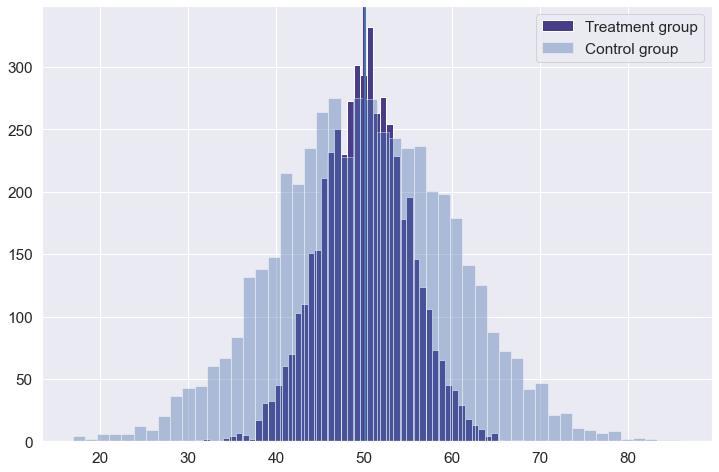

In [53]:
plt.hist(metric_treatment, bins=50, label='Treatment group', color='darkslateblue')
plt.axvline(np.mean(metric_treatment), c='darkslateblue')
plt.hist(metric_control, bins=50, alpha=0.4, label='Control group', color='b')
plt.axvline(np.mean(metric_control), c='b')
plt.legend()
plt.show()

### Test for the Normal case with the different mean and same variance (Alternative)

In [54]:
mean_metric_control = 50
mean_metric_treatement = 45

In [55]:
# 1 will correspond to rejecting the null
coverage_results = list()

for cur_sim in range(num_of_simulations):
  # simulate data
  metric_treatment = np.random.normal(loc = mean_metric_treatement, scale=5, size=[num_of_clients, 1])
  metric_control = np.random.normal(loc = mean_metric_control, scale=5, size=[num_of_clients, 1])
  client_id = np.arange(1, num_of_clients + 1).reshape(num_of_clients, 1) 

  # create required data frames
  df_treatment = pd.DataFrame(data = np.concatenate([client_id, metric_treatment],axis=1), columns=['Client ID', 'Metric Value'] )
  df_control = pd.DataFrame(data = np.concatenate([client_id, metric_control],axis=1), columns=['Client ID', 'Metric Value'] ) 

  # perform test
  ci_center, ci_width = jackknife_cookie_bucket_mean(df_treatment, df_control, 20, 0.95)

  if (ci_center-ci_width < 0) and  (ci_center+ci_width > 0):
    coverage_results += [0]
  else:
    coverage_results += [1]


In [56]:
print('Rejection rate: {:2.2%}'.format(np.mean(coverage_results)))

Rejection rate: 100.00%


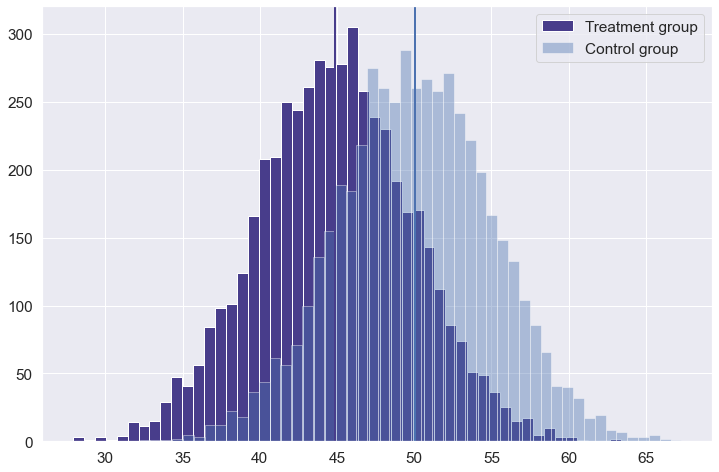

In [57]:
plt.hist(metric_treatment, bins=50, label='Treatment group', color='darkslateblue')
plt.axvline(np.mean(metric_treatment), c='darkslateblue')
plt.hist(metric_control, bins=50, alpha=0.4, label='Control group', color='b')
plt.axvline(np.mean(metric_control), c='b')
plt.legend()
plt.show()

### Test for the Normal case with the different mean and different variance (Alternative)

In [14]:
# 1 will correspond to rejecting the null
coverage_results = list()

for cur_sim in range(num_of_simulations):
  # simulate data
  metric_treatment = np.random.normal(loc = mean_metric_treatement, scale=5, size=[num_of_clients, 1])
  metric_control = np.random.normal(loc = mean_metric_control, scale=10, size=[num_of_clients, 1])
  client_id = np.arange(1, num_of_clients + 1).reshape(num_of_clients, 1) 

  # create required data frames
  df_treatment = pd.DataFrame(data = np.concatenate([client_id, metric_treatment],axis=1), columns=['Client ID', 'Metric Value'] )
  df_control = pd.DataFrame(data = np.concatenate([client_id, metric_control],axis=1), columns=['Client ID', 'Metric Value'] ) 

  # perform test
  ci_center, ci_width = jackknife_cookie_bucket_mean(df_treatment, df_control, 20, 0.95)

  if (ci_center-ci_width < 0) and  (ci_center+ci_width > 0):
    coverage_results += [0]
  else:
    coverage_results += [1]


In [15]:
print('Rejection rate: {:2.2%}'.format(np.mean(coverage_results)))

Rejection rate: 100.00%


# Jackknife Cookie bucket test for quantiles

### Description

Let $M$ be some metric of interest. Let subscript 0 correspond to the control group and 1 - to the treatment group. Then the Jackknife Cookie Bucket test is defined as follows:
* Data is split randomly in $N$ buckets (we use $N=20$)
* Let $M_{0,-j}$ is the chosen quantile of the metric observed in the control $M_{0}$ across all buckets **except** $j$. $M_{1,-j}$ is defined similarly. The second index omited in case one refers to the total change in the metric value across all buckets
* Overall percent change in all buckets is defined as: $$ PC= 100\times \left(  \frac{M_1}{M_0}-1 \right) $$
* Overall percent change in all buckets except $j$-th is defined as: $$ PC_{-j}= 100\times \left(  \frac{M_{1,-j}}{M_{0,-j}}-1 \right)$$
* Then define the pseudovalue of the percent change for bucket $j$: $$ps_{-j} =  N \cdot PC - (N-1)\cdot PC_{-j}$$
* Define: $$ps = \sum_{i=1}^Nps_{-j}, \quad SE_{ps}^2 =  \frac{1}{N-1}\sum_{j=1}^{N}(ps-ps_{-j})^2$$
* The final confidence interval for performing the test is defined as: $$ \left[ ps- q_{N-1,\alpha/2}\cdot SE_{ps}/\sqrt{N};\ ps+ q_{N-1,\alpha}\cdot SE_{ps}/\sqrt{N} \right] $$
where $q_{N-1,\alpha}$ corresponds to the corresponding quantile of the Student t-distribution with $N-1$ degrees of freedom. If $N=20$, then $q_{19,0.9}\approx 1.73, q_{19,0.95}\approx 2.09, q_{19,0.99}\approx 2.86$

### Problems with Jackknife for quantiles

Given a sample $X=(X_1, \dots, X_n)$, we estimates parameter $\theta$ using an estimator $\phi(X)=\phi_n(X_1,\dots,X_n)$. $i$-th pseudovalue of $\phi_n(X)$ is:
$$ps_i(X)=n\phi_n(X_1,\dots,X_n)-(n-1)\phi_{n-1}((X_1,\dots,X_n)_{[i]}) = \phi_n(X)+(n-1)(\phi_n(X)-\phi_{n-1}(X_{[i]}))$$
where $X_{[i]}=(X_1,\dots,X_n)_{[i]}$ means that $i$-th value in a sample has been deleted. Then:
$$ ps(X)=\frac{1}{n}\sum_{i=1}^nps_i(X), \quad V_{ps}(X)=\frac{1}{n-1}\sum_{i=1}^n(ps_i(X)-ps(X))^2 $$
with the consequent construction of the CI for $\theta$. Generalization, which is used actually here is delete-$k$ or block jackknife.

Problems arise when the estimator is too discontinuous as a function of $X_i$ or if $\phi(X)$ depends on one or a few values in $X$, which is actually the case for quantiles.
**Example** Assume that $\phi_n(X)$ is the sample median. Assume that $X_i$'s are distinct and $n=2m$ is even. Then:

* there are two values $X_{(m)}$ and $X_{(m+1)}$ such that:
$$\phi_{n-1}(X_{[i]}) = X_{(m+1)}, \quad i\leq m$$
and  
$$\phi_{n-1}(X_{[i]}) = X_{(m)}, \quad i\geq m+1$$
Hence,
$$ps(X) = \frac{1}{2}(X_{(m)}+X_{(m+1)}) = \phi_n(X)$$
Thus,
$$
\quad V_{ps}(X)=\frac{n(n-1)}{4}(X_{(m)}-X_{(m+1)})^2 \rightarrow \sigma^2 (\chi^2_2/2)^2
$$

where $\sigma^2$ is the asymptotic variance of $n^{1/2}(\phi_n(X)- med(F_X))$ meaning that variance estimator is inconsistent. For delete-$k$ Jackknife k should satisfy $n^{1/2}/k\rightarrow 0$ and $n-k\rightarrow\infty$ to achieve consistency.

In our case, we have 20 buckets meaning that we take $k=n/20$


### Test for the Normal case with the same mean and same variance (Null)

In [28]:
mean_metric_control = 50
mean_metric_treatement = 50
num_of_clients=5000

In [29]:
# 1 will correspond to rejecting the null
coverage_results = list()
tracking_samples = list()
for cur_sim in range(num_of_simulations):
  # simulate data
  metric_treatment = np.random.normal(loc = mean_metric_treatement, scale=5, size=[num_of_clients, 1])
  metric_control = np.random.normal(loc = mean_metric_control, scale=5, size=[num_of_clients, 1])
  client_id = np.arange(1, num_of_clients + 1).reshape(num_of_clients, 1) 

  # create required data frames
  df_treatment = pd.DataFrame(data = np.concatenate([client_id, metric_treatment],axis=1),
    columns=['Client ID', 'Metric Value'] )
  df_control = pd.DataFrame(data = np.concatenate([client_id, metric_control],axis=1),
    columns=['Client ID', 'Metric Value'] ) 

  # perform test
  ci_center, ci_width = jackknife_cookie_bucket_quantile(df_treatment, df_control, 20, 0.95,
    quantile_to_test=0.5)

  if (ci_center-ci_width < 0) and  (ci_center+ci_width > 0):
    coverage_results += [0]
  else:
    coverage_results += [1]
    tracking_samples+= [[[metric_treatment],[metric_control]]]


In [30]:
print('Rejection rate: {:2.2%}'.format(np.mean(coverage_results)))

Rejection rate: 11.40%


In [32]:
len(tracking_samples)

114

In [36]:
tracking_samples[cur_sample][0][0]

array([[62.69433695],
       [50.5669764 ],
       [48.26948828],
       ...,
       [49.73103281],
       [46.46805883],
       [47.45525629]])

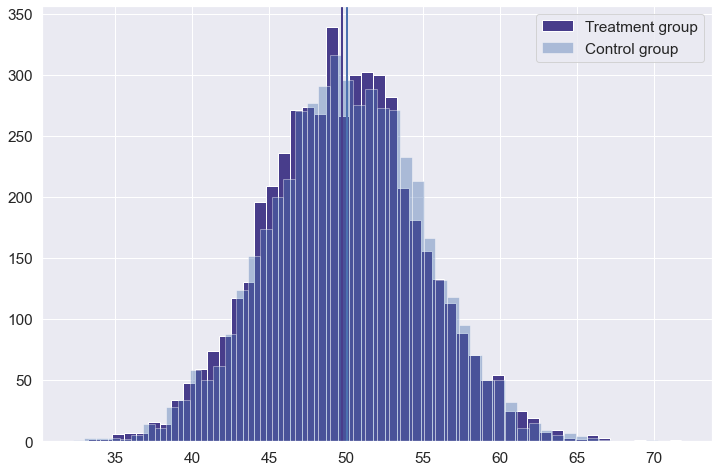

In [53]:
cur_sample=5
plt.hist(tracking_samples[cur_sample][0][0], bins=50, label='Treatment group', color='darkslateblue')
plt.axvline(np.quantile(tracking_samples[cur_sample][0][0], q=0.5), c='darkslateblue')
plt.hist(tracking_samples[cur_sample][1][0], bins=50, alpha=0.4, label='Control group', color='b')
plt.axvline(np.quantile(tracking_samples[cur_sample][1][0], q=0.5), c='b')
plt.legend()
plt.show()

In [54]:
tracking_samples[cur_sample][0][0].mean()

49.802598381345376

In [55]:
np.quantile(tracking_samples[cur_sample][0][0],q=0.5)

49.751839024125665

In [56]:
tracking_samples[cur_sample][1][0].mean()

50.04965167400777

In [57]:
np.quantile(tracking_samples[cur_sample][1][0],q=0.5)

50.061324754644794

### Test for the Normal case with the same mean and different variance (Null)

In [19]:
# 1 will correspond to rejecting the null
coverage_results = list()

for cur_sim in range(num_of_simulations):
  # simulate data
  metric_treatment = np.random.normal(loc = mean_metric_treatement, scale=5, size=[num_of_clients, 1])
  metric_control = np.random.normal(loc = mean_metric_control, scale=10, size=[num_of_clients, 1])
  client_id = np.arange(1, num_of_clients + 1).reshape(num_of_clients, 1) 

  # create required data frames
  df_treatment = pd.DataFrame(data = np.concatenate([client_id, metric_treatment], axis=1),
    columns=['Client ID', 'Metric Value'] )
  df_control = pd.DataFrame(data = np.concatenate([client_id, metric_control], axis=1),
    columns=['Client ID', 'Metric Value'] ) 

  # perform test
  ci_center, ci_width = jackknife_cookie_bucket_quantile(df_treatment, df_control, 20, 0.95,
    quantile_to_test=0.5)

  if (ci_center-ci_width < 0) and  (ci_center+ci_width > 0):
    coverage_results += [0]
  else:
    coverage_results += [1]


In [20]:
print('Rejection rate: {:2.2%}'.format(np.mean(coverage_results)))

Rejection rate: 17.20%


### Test for the Normal case with different mean and same variance (Alternative)

In [21]:
mean_metric_control = 50
mean_metric_treatement = 45

In [22]:
# 1 will correspond to rejecting the null
coverage_results = list()

for cur_sim in range(num_of_simulations):
  # simulate data
  metric_treatment = np.random.normal(loc = mean_metric_treatement, scale=5, size=[num_of_clients, 1])
  metric_control = np.random.normal(loc = mean_metric_control, scale=5, size=[num_of_clients, 1])
  client_id = np.arange(1, num_of_clients + 1).reshape(num_of_clients, 1) 

  # create required data frames
  df_treatment = pd.DataFrame(data = np.concatenate([client_id, metric_treatment],axis=1),
    columns=['Client ID', 'Metric Value'] )
  df_control = pd.DataFrame(data = np.concatenate([client_id, metric_control],axis=1),
    columns=['Client ID', 'Metric Value'] ) 

  # perform test
  ci_center, ci_width = jackknife_cookie_bucket_quantile(df_treatment, df_control, 20, 0.95,
    quantile_to_test=0.5)

  if (ci_center-ci_width < 0) and  (ci_center+ci_width > 0):
    coverage_results += [0]
  else:
    coverage_results += [1]


In [23]:
print('Rejection rate: {:2.2%}'.format(np.mean(coverage_results)))

Rejection rate: 100.00%


### Test for the Normal case with different mean and different variance (Alternative)

In [24]:
# 1 will correspond to rejecting the null
coverage_results = list()

for cur_sim in range(num_of_simulations):
  # simulate data
  metric_treatment = np.random.normal(loc = mean_metric_treatement, scale=5, size=[num_of_clients, 1])
  metric_control = np.random.normal(loc = mean_metric_control, scale=10, size=[num_of_clients, 1])
  client_id = np.arange(1, num_of_clients + 1).reshape(num_of_clients, 1) 

  # create required data frames
  df_treatment = pd.DataFrame(data = np.concatenate([client_id, metric_treatment],axis=1),
    columns=['Client ID', 'Metric Value'] )
  df_control = pd.DataFrame(data = np.concatenate([client_id, metric_control],axis=1),
    columns=['Client ID', 'Metric Value'] ) 

  # perform test
  ci_center, ci_width = jackknife_cookie_bucket_quantile(df_treatment, df_control, 20, 0.95,
    quantile_to_test = 0.5)

  if (ci_center-ci_width < 0) and  (ci_center+ci_width > 0):
    coverage_results += [0]
  else:
    coverage_results += [1]


In [25]:
print('Rejection rate: {:2.2%}'.format(np.mean(coverage_results)))

Rejection rate: 100.00%


### Extreme quantiles in case of the same mean and variance (Null)

#### More observations

In [20]:
mean_metric_control = 50
mean_metric_treatement = 50
num_of_clients = 20000

In [21]:
# 1 will correspond to rejecting the null
coverage_results = list()

for cur_sim in range(num_of_simulations):
  # simulate data
  metric_treatment = np.random.normal(loc = mean_metric_treatement, scale=5, size=[num_of_clients, 1])
  metric_control = np.random.normal(loc = mean_metric_control, scale=5, size=[num_of_clients, 1])
  client_id = np.arange(1, num_of_clients + 1).reshape(num_of_clients, 1) 

  # create required data frames
  df_treatment = pd.DataFrame(data = np.concatenate([client_id, metric_treatment],axis=1),
    columns=['Client ID', 'Metric Value'] )
  df_control = pd.DataFrame(data = np.concatenate([client_id, metric_control],axis=1),
    columns=['Client ID', 'Metric Value'] ) 

  # perform test
  ci_center, ci_width = jackknife_cookie_bucket_quantile(df_treatment, df_control, 20, 0.95,
    quantile_to_test=0.95)

  if (ci_center-ci_width < 0) and  (ci_center+ci_width > 0):
    coverage_results += [0]
  else:
    coverage_results += [1]


In [22]:
print('Rejection rate: {:2.2%}'.format(np.mean(coverage_results)))

Rejection rate: 12.10%


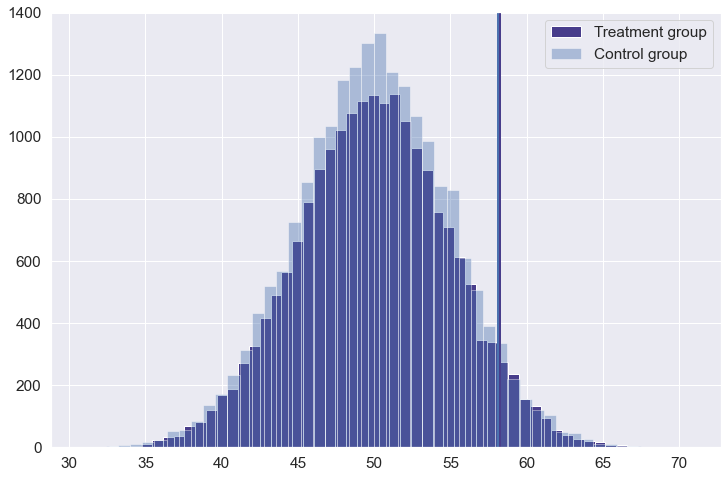

In [23]:
plt.hist(metric_treatment, bins=50, label='Treatment group', color='darkslateblue')
plt.axvline(np.quantile(metric_treatment, q=0.95), c='darkslateblue')
plt.hist(metric_control, bins=50, alpha=0.4, label='Control group', color='b')
plt.axvline(np.quantile(metric_control, q=0.95), c='b')
plt.legend()
plt.show()

#### Less observations

In [16]:
mean_metric_control = 50
mean_metric_treatement = 50
num_of_clients = 1000

In [17]:
# 1 will correspond to rejecting the null
coverage_results = list()

for cur_sim in range(num_of_simulations):
  # simulate data
  metric_treatment = np.random.normal(loc = mean_metric_treatement, scale=5, size=[num_of_clients, 1])
  metric_control = np.random.normal(loc = mean_metric_control, scale=5, size=[num_of_clients, 1])
  client_id = np.arange(1, num_of_clients + 1).reshape(num_of_clients, 1) 

  # create required data frames
  df_treatment = pd.DataFrame(data = np.concatenate([client_id, metric_treatment],axis=1),
    columns=['Client ID', 'Metric Value'] )
  df_control = pd.DataFrame(data = np.concatenate([client_id, metric_control],axis=1),
    columns=['Client ID', 'Metric Value'] ) 

  # perform test
  ci_center, ci_width = jackknife_cookie_bucket_quantile(df_treatment, df_control, 20, 0.95,
    quantile_to_test=0.95)

  if (ci_center-ci_width < 0) and  (ci_center+ci_width > 0):
    coverage_results += [0]
  else:
    coverage_results += [1]


In [18]:
print('Rejection rate: {:2.2%}'.format(np.mean(coverage_results)))

Rejection rate: 29.60%


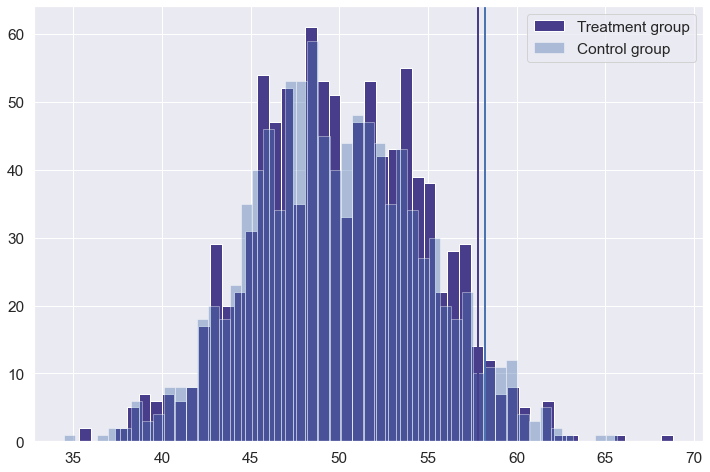

In [19]:
plt.hist(metric_treatment, bins=50, label='Treatment group', color='darkslateblue')
plt.axvline(np.quantile(metric_treatment, q=0.95), c='darkslateblue')
plt.hist(metric_control, bins=50, alpha=0.4, label='Control group', color='b')
plt.axvline(np.quantile(metric_control, q=0.95), color='b')
plt.legend()
plt.show()

### Extreme quantile in case of the same mean, but different variance (Alternative)

In [34]:
mean_metric_control = 50
mean_metric_treatement = 50
num_of_clients = 10000

In [35]:
# 1 will correspond to rejecting the null
coverage_results = list()

for cur_sim in range(num_of_simulations):
  # simulate data
  metric_treatment = np.random.normal(loc = mean_metric_treatement, scale=5, size=[num_of_clients, 1])
  metric_control = np.random.normal(loc = mean_metric_control, scale=10, size=[num_of_clients, 1])
  client_id = np.arange(1, num_of_clients + 1).reshape(num_of_clients, 1) 

  # create required data frames
  df_treatment = pd.DataFrame(data = np.concatenate([client_id, metric_treatment],axis=1),
    columns=['Client ID', 'Metric Value'] )
  df_control = pd.DataFrame(data = np.concatenate([client_id, metric_control],axis=1),
    columns=['Client ID', 'Metric Value'] ) 

  # perform test
  ci_center, ci_width = jackknife_cookie_bucket_quantile(df_treatment, df_control, 20, 0.95,
    quantile_to_test=0.95)

  if (ci_center-ci_width < 0) and  (ci_center+ci_width > 0):
    coverage_results += [0]
  else:
    coverage_results += [1]


In [36]:
print('Rejection rate: {:2.2%}'.format(np.mean(coverage_results)))

Rejection rate: 100.00%


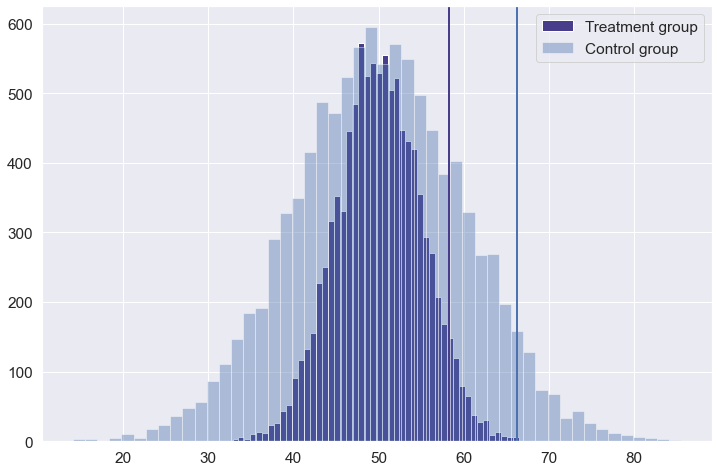

In [37]:
plt.hist(metric_treatment, bins=50, label='Treatment group', color='darkslateblue')
plt.axvline(np.quantile(metric_treatment, q=0.95), c='darkslateblue')
plt.hist(metric_control, bins=50, alpha=0.4, label='Control group', color='b')
plt.axvline(np.quantile(metric_control, q=0.95), color='b')
plt.legend()
plt.show()

## Testing for median and for the mean

In [107]:
mean_metric_control = 50
mean_metric_treatement = 50
num_of_clients=20000

In [108]:
# 1 will correspond to rejecting the null
coverage_results_mean = list()
coverage_results_median = list()
tracking_samples = list()
n_buckets = 20
width_median = list()
width_mean = list()


for cur_sim in range(num_of_simulations):
  # simulate data
  metric_treatment = np.random.normal(loc = mean_metric_treatement, scale=5, size=[num_of_clients, 1])
  metric_control = np.random.normal(loc = mean_metric_control, scale=5, size=[num_of_clients, 1])
  client_id = np.arange(1, num_of_clients + 1).reshape(num_of_clients, 1) 

  # create required data frames
  df_treatment = pd.DataFrame(data = np.concatenate([client_id, metric_treatment],axis=1),
    columns=['Client ID', 'Metric Value'] )
  df_control = pd.DataFrame(data = np.concatenate([client_id, metric_control],axis=1),
    columns=['Client ID', 'Metric Value'] ) 

  # perform test for median
  ci_center_med, ci_width_med = jackknife_cookie_bucket_quantile(df_treatment, df_control, n_buckets, 0.95,
    quantile_to_test=0.5)

  ci_center_mean, ci_width_mean = jackknife_cookie_bucket_mean(df_treatment, df_control, n_buckets, 0.95)


  if (ci_center_mean-ci_width_mean < 0) and  (ci_center_mean+ci_width_mean > 0):
    test_mean = 0
  else:
    test_mean = 1

  if (ci_center_med-ci_width_med < 0) and  (ci_center_med+ci_width_med > 0):
    test_med = 0
  else:
    test_med = 1
  
  width_median+=[ci_width_med]
  width_mean+=[ci_width_mean]
  coverage_results_mean+=[test_mean]
  coverage_results_median+=[test_med]
  if test_mean==0 and test_med ==1:
    tracking_samples+= [[metric_treatment,metric_control]]


In [109]:
print('Rejection rate: {:2.2%}'.format(np.mean(coverage_results_mean)))

Rejection rate: 4.50%


In [110]:
print('Rejection rate: {:2.2%}'.format(np.mean(coverage_results_median)))

Rejection rate: 9.90%


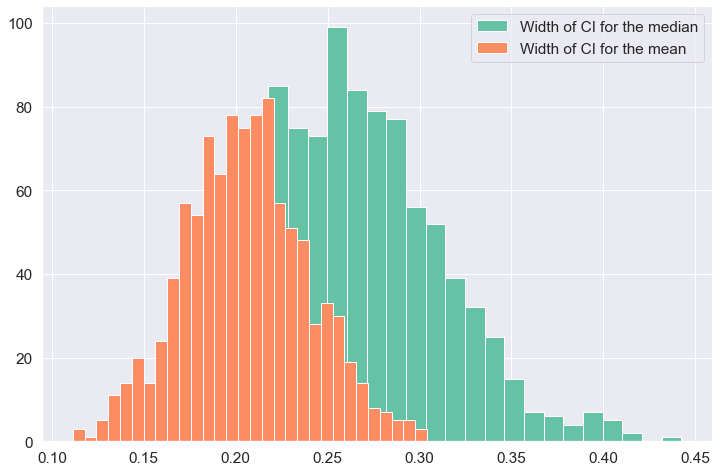

In [113]:
plt.hist(width_median,label='Width of CI for the median', bins=30)
plt.hist(width_mean,label='Width of CI for the mean', bins=30)
plt.legend()
plt.show()

In [83]:
len(tracking_samples)

19

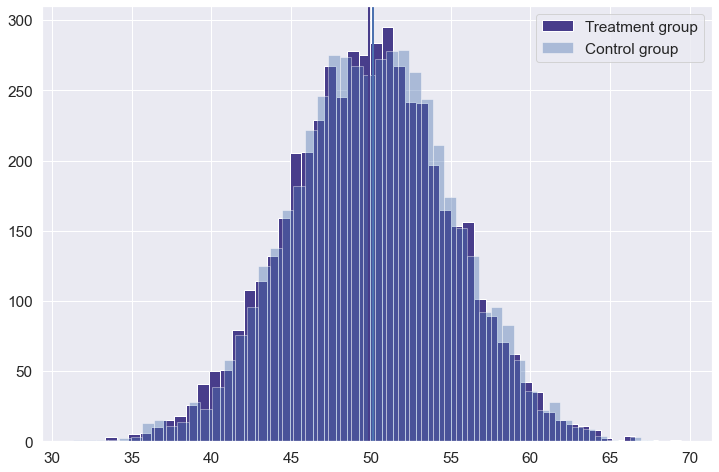

In [84]:
cur_sample=10
plt.hist(tracking_samples[cur_sample][0], bins=50, label='Treatment group', color='darkslateblue')
plt.axvline(np.quantile(tracking_samples[cur_sample][0], q=0.5), c='darkslateblue')
plt.hist(tracking_samples[cur_sample][1], bins=50, alpha=0.4, label='Control group', color='b')
plt.axvline(np.quantile(tracking_samples[cur_sample][1], q=0.5), c='b')
plt.legend()
plt.show()

In [69]:
tracking_samples[cur_sample][0].mean()

50.18068638937734

In [70]:
np.quantile(tracking_samples[cur_sample][0],q=0.5)

50.188202569538916

In [71]:
tracking_samples[cur_sample][1].mean()

49.91210088179452

In [72]:
np.quantile(tracking_samples[cur_sample][1],q=0.5)

49.87343045385819

In [150]:
mean_metric_control = 50
mean_metric_treatement = 50
num_of_clients=10000

In [151]:
# 1 will correspond to rejecting the null
coverage_results_mean = list()
coverage_results_median = list()
tracking_samples = list()
n_buckets = 20
width_median = list()
width_mean = list()


for cur_sim in range(num_of_simulations):
  # simulate data
  metric_treatment = np.random.normal(loc = mean_metric_treatement, scale=5, size=[num_of_clients, 1])
  metric_control = np.random.normal(loc = mean_metric_control, scale=5, size=[num_of_clients, 1])
  client_id = np.arange(1, num_of_clients + 1).reshape(num_of_clients, 1) 

  # create required data frames
  df_treatment = pd.DataFrame(data = np.concatenate([client_id, metric_treatment],axis=1),
    columns=['Client ID', 'Metric Value'] )
  df_control = pd.DataFrame(data = np.concatenate([client_id, metric_control],axis=1),
    columns=['Client ID', 'Metric Value'] ) 

  # perform test for median
  ci_center_med, ci_width_med = jackknife_cookie_bucket_quantile(df_treatment, df_control, n_buckets, 0.95,
    quantile_to_test=0.5)

  ci_center_mean, ci_width_mean = jackknife_cookie_bucket_mean(df_treatment, df_control, n_buckets, 0.95)


  if (ci_center_mean-ci_width_mean < 0) and  (ci_center_mean+ci_width_mean > 0):
    test_mean = 0
  else:
    test_mean = 1

  if (ci_center_med-ci_width_med < 0) and  (ci_center_med+ci_width_med > 0):
    test_med = 0
  else:
    test_med = 1
  
  width_median+=[ci_width_med]
  width_mean+=[ci_width_mean]
  coverage_results_mean+=[test_mean]
  coverage_results_median+=[test_med]
  if test_mean==0 and test_med ==1:
    tracking_samples+= [[metric_treatment,metric_control]]


In [152]:
print('Rejection rate: {:2.2%}'.format(np.mean(coverage_results_mean)))

Rejection rate: 3.70%


In [153]:
print('Rejection rate: {:2.2%}'.format(np.mean(coverage_results_median)))

Rejection rate: 9.90%


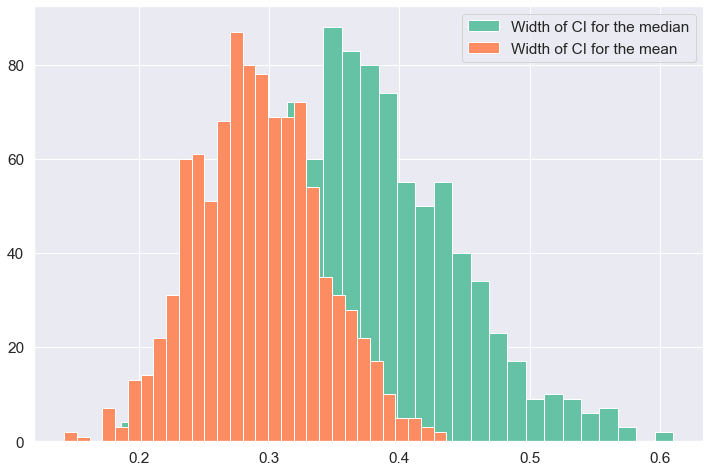

In [154]:
plt.hist(width_median,label='Width of CI for the median', bins=30)
plt.hist(width_mean,label='Width of CI for the mean', bins=30)
plt.legend()
plt.show()

In [155]:
df_treatment = pd.DataFrame(data = np.concatenate([client_id, tracking_samples[0][0]],axis=1),
    columns=['Client ID', 'Metric Value'] )
df_control = pd.DataFrame(data = np.concatenate([client_id, tracking_samples[0][0]],axis=1),
    columns=['Client ID', 'Metric Value'] ) 

In [156]:
df_treatment['Bucket id'] = (
        df_treatment['Client ID'] % n_buckets).astype('int')
df_control['Bucket id'] = (
    df_control['Client ID'] % n_buckets).astype('int')

# list of all bucket ids
bucket_ids = np.arange(n_buckets).tolist()



In [143]:
# for stacking the results for both treatment and control groups
treatment_group_mv = list()
control_group_mv = list()

for cur_bucket in bucket_ids:
    # leave one bucket out and compute the mean
    treatment_group_mv += [df_treatment.loc[df_treatment['Bucket id']
                                                != cur_bucket]['Metric Value'].mean()]
    control_group_mv += [df_control.loc[df_control['Bucket id']
                                            != cur_bucket]['Metric Value'].mean()]

# removing temporary column
#treatment_group = treatment_group.drop(axis=1, columns=['Bucket id'])
#control_group = control_group.drop(axis=1, columns=['Bucket id'])

# convert to array for further purposes
#treatment_group_mv = np.stack(treatment_group_mv)
#control_group_mv = np.stack(control_group_mv)

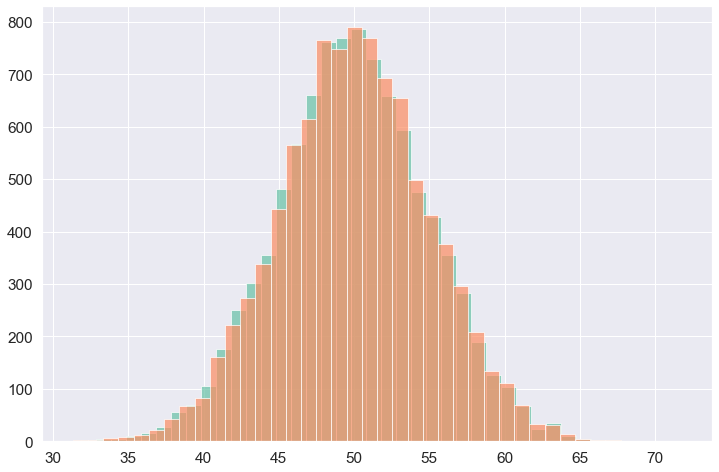

In [157]:
plt.hist(df_treatment.loc[df_treatment['Bucket id'] != 0]['Metric Value'], bins=40, alpha=0.7)
plt.hist(df_treatment.loc[df_treatment['Bucket id'] != 1]['Metric Value'], bins=40, alpha=0.7)
#plt.hist(df_treatment.loc[df_treatment['Bucket id'] != 2]['Metric Value'], bins=40, alpha=0.5)
plt.show()

(49.5, 50.5)

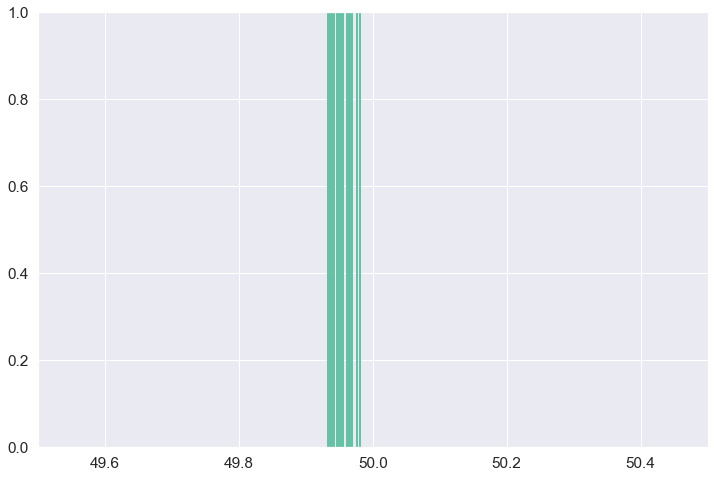

In [158]:
for cur_bucket in range(20):
    plt.axvline(np.quantile(df_treatment.loc[df_treatment['Bucket id'] != cur_bucket]['Metric Value'], q=0.5))
plt.xlim([49.5,50.5])

(49.5, 50.5)

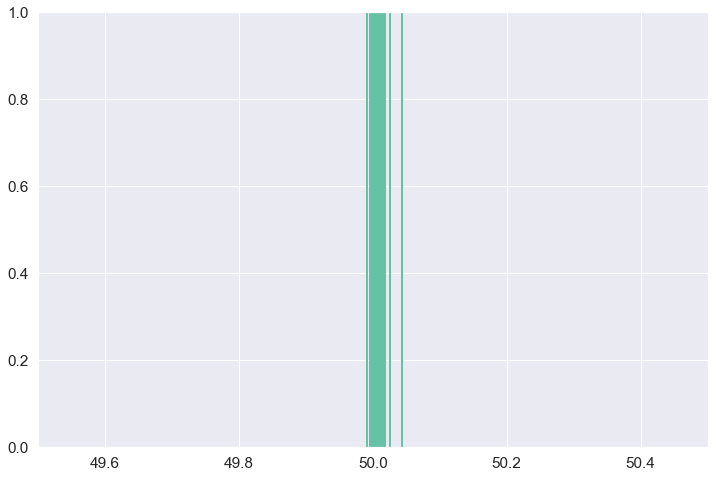

In [159]:
for cur_bucket in range(20):
    plt.axvline(np.mean(df_treatment.loc[df_treatment['Bucket id'] != cur_bucket]['Metric Value']))
plt.xlim([49.5,50.5])

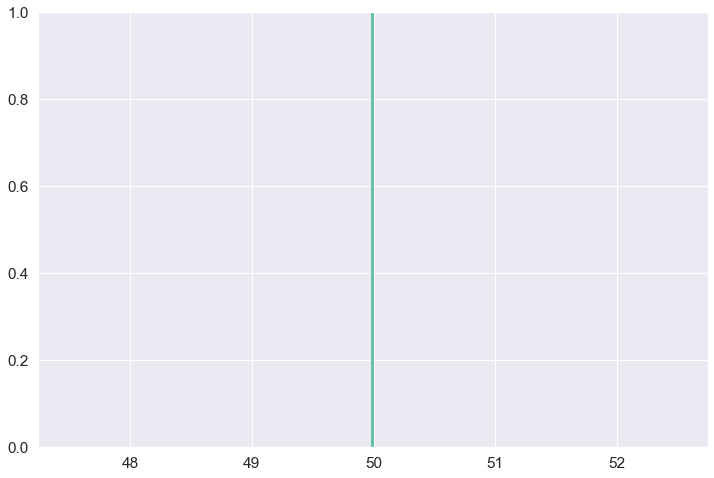

In [139]:
plt.axvline(np.mean(df_treatment.loc[df_treatment['Bucket id'] != 0]['Metric Value']))
plt.axvline(np.mean(df_treatment.loc[df_treatment['Bucket id'] != 4]['Metric Value']))